# Descripción del Proyecto

El proyecto consistirá en preparar el prototipo de un modelo de machine learning para Zyfra. La empresa desarrolla soluciones de eficiencia para la industria pesada.
El modelo deberá predecir la cantidad de oro extraído del mineral de oro. Disponemos de los datos de extracción y purificación.

Los datos se almacenan en tres archivos:  
- `gold_recovery_train.csv` — el dataset de entrenamiento  
- `gold_recovery_test.csv` —el dataset de prueba  
- `gold_recovery_full.csv` — el dataset fuente  

Los datos se indexan con la fecha y la hora de adquisición (date). Los parámetros cercanos en el tiempo suelen ser similares.
Algunos parámetros no están disponibles porque fueron medidos o calculados mucho más tarde. Por eso, algunas de las características que están presentes en el conjunto de entrenamiento pueden estar ausentes en el conjunto de prueba. El conjunto de prueba tampoco contiene objetivos.
El dataset fuente contiene los conjuntos de entrenamiento y prueba con todas las características.

<h1>Tabla de Contenidos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Inicialización" data-toc-modified-id="Inicialización-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Inicialización</a></span></li><li><span><a href="#Cargar-los-datos" data-toc-modified-id="Cargar-los-datos-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cargar los datos</a></span><ul class="toc-item"><li><span><a href="#Dataset-de-entrenamiento-(data_train)" data-toc-modified-id="Dataset-de-entrenamiento-(data_train)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Dataset de entrenamiento (data_train)</a></span></li><li><span><a href="#Dataset-de-prueba-(data_test)" data-toc-modified-id="Dataset-de-prueba-(data_test)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Dataset de prueba (data_test)</a></span></li><li><span><a href="#Dataset-completo-(data_full)" data-toc-modified-id="Dataset-completo-(data_full)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Dataset completo (data_full)</a></span></li></ul></li><li><span><a href="#Preparación-de-los-datos" data-toc-modified-id="Preparación-de-los-datos-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preparación de los datos</a></span><ul class="toc-item"><li><span><a href="#Comprobación-del-cálculo-de-recuperación" data-toc-modified-id="Comprobación-del-cálculo-de-recuperación-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Comprobación del cálculo de recuperación</a></span></li><li><span><a href="#Analisis-del-dataset-de-prueba-(data_test)" data-toc-modified-id="Analisis-del-dataset-de-prueba-(data_test)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Analisis del dataset de prueba (data_test)</a></span></li><li><span><a href="#Preprocesamiento-de-los-datos-de-entrenamiento-(data_train)" data-toc-modified-id="Preprocesamiento-de-los-datos-de-entrenamiento-(data_train)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Preprocesamiento de los datos de entrenamiento (data_train)</a></span></li></ul></li><li><span><a href="#Analisis-antes-del-entrenamiento" data-toc-modified-id="Analisis-antes-del-entrenamiento-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Analisis antes del entrenamiento</a></span><ul class="toc-item"><li><span><a href="#Concentración-de-los-metales-en-cada-fase" data-toc-modified-id="Concentración-de-los-metales-en-cada-fase-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Concentración de los metales en cada fase</a></span></li><li><span><a href="#Limpieza-de-valores-anormales" data-toc-modified-id="Limpieza-de-valores-anormales-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Limpieza de valores anormales</a></span></li><li><span><a href="#Distribución-del-tamaño-de-las-particulas-de-alimentación" data-toc-modified-id="Distribución-del-tamaño-de-las-particulas-de-alimentación-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Distribución del tamaño de las particulas de alimentación</a></span></li></ul></li><li><span><a href="#Entrenamiento-de-modelos" data-toc-modified-id="Entrenamiento-de-modelos-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Entrenamiento de modelos</a></span><ul class="toc-item"><li><span><a href="#Metrica-de-evaluación-del-modelo-(sMAPE)" data-toc-modified-id="Metrica-de-evaluación-del-modelo-(sMAPE)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Metrica de evaluación del modelo (sMAPE)</a></span></li><li><span><a href="#Entrenamiento-de-modelos" data-toc-modified-id="Entrenamiento-de-modelos-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Entrenamiento de modelos</a></span><ul class="toc-item"><li><span><a href="#Preparación-final-de-dataset-de-entrenamiento" data-toc-modified-id="Preparación-final-de-dataset-de-entrenamiento-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Preparación final de dataset de entrenamiento</a></span></li><li><span><a href="#Entrenamiento-del-modelo" data-toc-modified-id="Entrenamiento-del-modelo-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Entrenamiento del modelo</a></span></li></ul></li></ul></li><li><span><a href="#Aplicación-del-modelo-con-muestra-de-prueba" data-toc-modified-id="Aplicación-del-modelo-con-muestra-de-prueba-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Aplicación del modelo con muestra de prueba</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Inicialización

In [1]:
# Cargamos todas las librerías a usar
import pandas as pd
from IPython.display import display, HTML, Image
import matplotlib.pyplot as plt
import numpy as np

#from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_absolute_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

from sklearn.model_selection import cross_val_score

pd.set_option('display.max_rows', None)    
pd.set_option('display.max_columns', None)

In [2]:
#Definimos una función Print que sea visualmente mas amigable
def print_mejorado(texto,size):
    size=str(size)
    display(HTML('<span style="font-size: '+size+'px;">'+texto+'</span>'))  

## Cargar los datos

In [3]:
data_train=pd.read_csv('/datasets/gold_recovery_train.csv')
data_test=pd.read_csv('/datasets/gold_recovery_test.csv')
data_full=pd.read_csv('/datasets/gold_recovery_full.csv')

### Dataset de entrenamiento (data_train)

In [4]:
data_train.head()

date  final.output.concentrate_ag  \
0  2016-01-15 00:00:00                     6.055403   
1  2016-01-15 01:00:00                     6.029369   
2  2016-01-15 02:00:00                     6.055926   
3  2016-01-15 03:00:00                     6.047977   
4  2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501              68.116445             10.507046   
3                    42.689819              68.347543             10.422762   
4                    42.774141              66.927016             10.360302   

   final.output.tail_pb  final.output.tail_sol  final.output.tail_au  \
0              0.895447              16.904297              2.143149   
1              0.927452              16.634514              2.224930   
2              0.953716              16.208849              2.257889   
3              0.883763              16.532835              2.146849   
4              0.792826              16.525686              2.055292   

   primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
0                     127.092003                         10.128295   
1                     125.629232                         10.296251   
2                     123.819808                         11.316280   
3                     122.270188                         11.322140   
4                     117.988169                         11.913613   

   primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
0                             7.25                        0.988759   
1                             7.25                        1.002663   
2                             7.25                        0.991265   
3                             7.25                        0.996739   
4                             7.25                        1.009869   

   primary_cleaner.output.concentrate_ag  \
0                               8.547551   
1                               8.558743   
2                               8.603505   
3                               7.221879   
4                               9.089428   

   primary_cleaner.output.concentrate_pb  \
0                              10.389648   
1                              10.497069   
2                              10.354494   
3                               8.496563   
4                               9.986786   

   primary_cleaner.output.concentrate_sol  \
0                               19.529297   
1                               19.369147   
2                               19.167579   
3                               15.978538   
4                               19.199864   

   primary_cleaner.output.concentrate_au  primary_cleaner.output.tail_ag  \
0                              34.174427                       14.936526   
1                              34.118526                       16.250511   
2                              33.969464                       16.491823   
3                              28.260743                       16.024359   
4                              33.044932                       16.480185   

   primary_cleaner.output.tail_pb  primary_cleaner.output.tail_sol  \
0                        2.534912                         7.476074   
1                        3.049646                         6.733907   
2                        3.124664                         6.471768   
3             

In [5]:
data_train.describe()

final.output.concentrate_ag  final.output.concentrate_pb  \
count                 16788.000000                 16788.000000   
mean                      4.716907                     9.113559   
std                       2.096718                     3.389495   
min                       0.000000                     0.000000   
25%                       3.971262                     8.825748   
50%                       4.869346                    10.065316   
75%                       5.821176                    11.054809   
max                      16.001945                    17.031899   

       final.output.concentrate_sol  final.output.concentrate_au  \
count                  16490.000000                 16789.000000   
mean                       8.301123                    39.467217   
std                        3.825760                    13.917227   
min                        0.000000                     0.000000   
25%                        6.939185                    42.055722   
50%                        8.557228                    44.498874   
75%                       10.289741                    45.976222   
max                       18.124851                    53.611374   

       final.output.recovery  final.output.tail_ag  final.output.tail_pb  \
count           15339.000000          16794.000000          16677.000000   
mean               67.213166              8.757048              2.360327   
std                11.960446              3.634103              1.215576   
min                 0.000000              0.000000              0.000000   
25%                62.625685              7.610544              1.641604   
50%                67.644601              9.220393              2.453690   
75%                72.824595             10.971110              3.192404   
max               100.000000             19.552149              6.086532   

       final.output.tail_sol  final.output.tail_au  \
count           16715.000000          16794.000000   
mean                9.303932              2.687512   
std                 4.263208              1.272757   
min                 0.000000              0.000000   
25%                 7.870275              2.172953   
50%                10.021968              2.781132   
75%                11.648573              3.416936   
max                22.317730              9.789625   

       primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
count                   15553.000000                      15598.000000   
mean                      129.479789                          8.625021   
std                        45.386931                          3.698633   
min                         0.000003                          0.000000   
25%                       103.064021                          6.004886   
50%                       131.783108                          8.016531   
75%                       159.539839                         11.437819   
max                       251.999948                         40.000000   

       primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
count                     16860.000000                    15875.000000   
mean                          7.297285                        0.843812   
std                           0.619166                        0.419098   
min                           1.080000                        0.000005   
25%                           6.940000                        0.568934   
50%                           7.285000                        0.844271   
75%                           7.700000                        1.097080   
max                          10.470000                        6.027907   

       primary_cleaner.output.concentrate_ag  \
count                           16778.000000   
mean                                7.422640   
std                                 3.105117   
min                                 0.000000   
25%                                 6.612584

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


### Dataset de prueba (data_test)

In [7]:
data_test.head()

date  primary_cleaner.input.sulfate  \
0  2016-09-01 00:59:59                     210.800909   
1  2016-09-01 01:59:59                     215.392455   
2  2016-09-01 02:59:59                     215.259946   
3  2016-09-01 03:59:59                     215.336236   
4  2016-09-01 04:59:59                     199.099327   

   primary_cleaner.input.depressant  primary_cleaner.input.feed_size  \
0                         14.993118                         8.080000   
1                         14.987471                         8.080000   
2                         12.884934                         7.786667   
3                         12.006805                         7.640000   
4                         10.682530                         7.530000   

   primary_cleaner.input.xanthate  primary_cleaner.state.floatbank8_a_air  \
0                        1.005021                             1398.981301   
1                        0.990469                             1398.777912   
2                        0.996043                             1398.493666   
3                        0.863514                             1399.618111   
4                        0.805575                             1401.268123   

   primary_cleaner.state.floatbank8_a_level  \
0                               -500.225577   
1                               -500.057435   
2                               -500.868360   
3                               -498.863574   
4                               -500.808305   

   primary_cleaner.state.floatbank8_b_air  \
0                             1399.144926   
1                             1398.055362   
2                             1398.860436   
3                             1397.440120   
4                             1398.128818   

   primary_cleaner.state.floatbank8_b_level  \
0                               -499.919735   
1                               -499.778182   
2                               -499.764529   
3                               -499.211024   
4                               -499.504543   

   primary_cleaner.state.floatbank8_c_air  \
0                             1400.102998   
1                             1396.151033   
2                             1398.075709   
3                             1400.129303   
4                             1402.172226   

   primary_cleaner.state.floatbank8_c_level  \
0                               -500.704369   
1                               -499.240168   
2                               -502.151509   
3                               -498.355873   
4                               -500.810606   

   primary_cleaner.state.floatbank8_d_air  \
0                             1399.001695   
1                             1399.508091   
2                             1399.497088   
3                             1401.065165   
4                             1399.480508   

   primary_cleaner.state.floatbank8_d_level  rougher.input.feed_ag  \
0                               -499.485144              13.128569   
1                               -500.416324              13.036280   
2                               -499.715479              13.138412   
3                               -501.038738              12.400507   
4                               -499.374053              11.327427   

   rougher.input.feed_pb  rougher.input.feed_rate  rougher.input.feed_size  \
0               5.636710               489.793655                62.710452   
1               5.526065               490.104534                61.961163   
2               5.426561               489.617969                66.903807   
3               5.114758               476.618130                59.865919   
4               4.767383               488.248117                63.315324   

   rougher.input.feed_sol  rougher.input.feed_au  \
0               42.022440              12.084103   
1               41.187903              11.918977   
2               42.546294              12.091332   
3               41.

In [8]:
data_test.describe()

primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
count                    5554.000000                       5572.000000   
mean                      170.515243                          8.482873   
std                        49.608602                          3.353105   
min                         0.000103                          0.000031   
25%                       143.340022                          6.411500   
50%                       176.103893                          8.023252   
75%                       207.240761                         10.017725   
max                       274.409626                         40.024582   

       primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
count                      5856.000000                     5690.000000   
mean                          7.264651                        1.321420   
std                           0.611526                        0.693246   
min                           5.650000                        0.000003   
25%                           6.885625                        0.888769   
50%                           7.259333                        1.183362   
75%                           7.650000                        1.763797   
max                          15.500000                        5.433169   

       primary_cleaner.state.floatbank8_a_air  \
count                             5840.000000   
mean                              1481.990241   
std                                310.453166   
min                                  0.000000   
25%                               1497.190681   
50%                               1554.659783   
75%                               1601.681656   
max                               2212.432090   

       primary_cleaner.state.floatbank8_a_level  \
count                               5840.000000   
mean                                -509.057796   
std                                   61.339256   
min                                 -799.773788   
25%                                 -500.455211   
50%                                 -499.997402   
75%                                 -499.575313   
max                                  -57.195404   

       primary_cleaner.state.floatbank8_b_air  \
count                             5840.000000   
mean                              1486.908670   
std                                313.224286   
min                                  0.000000   
25%                               1497.150234   
50%                               1553.268084   
75%                               1601.784707   
max                               1975.147923   

       primary_cleaner.state.floatbank8_b_level  \
count                               5840.000000   
mean                                -511.743956   
std                                   67.139074   
min                                 -800.029078   
25%                                 -500.936639   
50%                                 -500.066588   
75%                                 -499.323361   
max                                 -142.527229   

       primary_cleaner.state.floatbank8_c_air  \
count                             5840.000000   
mean                              1468.495216   
std                                309.980748   
min                                  0.000000   
25%                               1437.050321   
50%                               1546.160672   
75%                               1600.785573   
max                               1715.053773   

       primary_cleaner.state.floatbank8_c_level  \
count                               5840.000000   
mean                                -509.741212   
std                                   62.671873   
min                                 -799.995127   
25%                                 -501.300441   
50%                                 -500.079537   
75%                                 -499.009545   
max                

In [9]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

### Dataset completo (data_full)

In [10]:
data_full.head()

date  final.output.concentrate_ag  \
0  2016-01-15 00:00:00                     6.055403   
1  2016-01-15 01:00:00                     6.029369   
2  2016-01-15 02:00:00                     6.055926   
3  2016-01-15 03:00:00                     6.047977   
4  2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501              68.116445             10.507046   
3                    42.689819              68.347543             10.422762   
4                    42.774141              66.927016             10.360302   

   final.output.tail_pb  final.output.tail_sol  final.output.tail_au  \
0              0.895447              16.904297              2.143149   
1              0.927452              16.634514              2.224930   
2              0.953716              16.208849              2.257889   
3              0.883763              16.532835              2.146849   
4              0.792826              16.525686              2.055292   

   primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
0                     127.092003                         10.128295   
1                     125.629232                         10.296251   
2                     123.819808                         11.316280   
3                     122.270188                         11.322140   
4                     117.988169                         11.913613   

   primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
0                             7.25                        0.988759   
1                             7.25                        1.002663   
2                             7.25                        0.991265   
3                             7.25                        0.996739   
4                             7.25                        1.009869   

   primary_cleaner.output.concentrate_ag  \
0                               8.547551   
1                               8.558743   
2                               8.603505   
3                               7.221879   
4                               9.089428   

   primary_cleaner.output.concentrate_pb  \
0                              10.389648   
1                              10.497069   
2                              10.354494   
3                               8.496563   
4                               9.986786   

   primary_cleaner.output.concentrate_sol  \
0                               19.529297   
1                               19.369147   
2                               19.167579   
3                               15.978538   
4                               19.199864   

   primary_cleaner.output.concentrate_au  primary_cleaner.output.tail_ag  \
0                              34.174427                       14.936526   
1                              34.118526                       16.250511   
2                              33.969464                       16.491823   
3                              28.260743                       16.024359   
4                              33.044932                       16.480185   

   primary_cleaner.output.tail_pb  primary_cleaner.output.tail_sol  \
0                        2.534912                         7.476074   
1                        3.049646                         6.733907   
2                        3.124664                         6.471768   
3             

In [11]:
data_full.describe()

final.output.concentrate_ag  final.output.concentrate_pb  \
count                 22627.000000                 22629.000000   
mean                      4.781559                     9.095308   
std                       2.030128                     3.230797   
min                       0.000000                     0.000000   
25%                       4.018525                     8.750171   
50%                       4.953729                     9.914519   
75%                       5.862593                    10.929839   
max                      16.001945                    17.031899   

       final.output.concentrate_sol  final.output.concentrate_au  \
count                  22331.000000                 22630.000000   
mean                       8.640317                    40.001172   
std                        3.785035                    13.398062   
min                        0.000000                     0.000000   
25%                        7.116799                    42.383721   
50%                        8.908792                    44.653436   
75%                       10.705824                    46.111999   
max                       19.615720                    53.611374   

       final.output.recovery  final.output.tail_ag  final.output.tail_pb  \
count           20753.000000          22633.000000          22516.000000   
mean               67.447488              8.923690              2.488252   
std                11.616034              3.517917              1.189407   
min                 0.000000              0.000000              0.000000   
25%                63.282393              7.684016              1.805376   
50%                68.322258              9.484369              2.653001   
75%                72.950836             11.084557              3.287790   
max               100.000000             19.552149              6.086532   

       final.output.tail_sol  final.output.tail_au  \
count           22445.000000          22635.000000   
mean                9.523632              2.827459   
std                 4.079739              1.262834   
min                 0.000000              0.000000   
25%                 8.143576              2.303108   
50%                10.212998              2.913794   
75%                11.860824              3.555077   
max                22.861749              9.789625   

       primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
count                   21107.000000                      21170.000000   
mean                      140.277672                          8.587607   
std                        49.919004                          3.611361   
min                         0.000003                          0.000000   
25%                       110.177081                          6.018085   
50%                       141.330501                          8.018173   
75%                       174.049914                         11.003573   
max                       274.409626                         40.024582   

       primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
count                     22716.000000                    21565.000000   
mean                          7.288872                        0.969830   
std                           0.617357                        0.548083   
min                           1.080000                        0.000003   
25%                           6.920000                        0.626346   
50%                           7.280000                        0.905286   
75%                           7.680000                        1.200734   
max                          15.500000                        6.027907   

       primary_cleaner.output.concentrate_ag  \
count                           22618.000000   
mean                                7.691652   
std                                 3.109306   
min                                 0.000000   
25%                                 6.771102

In [12]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


Analizando al estructura de los 3 datasets proporcionados, vemos que todas las columnas estan en formato float menos la columna date. Además, se aprecian varias columnas con datos nulos. Estos valores deberán ser considerados al momento de entrenar y mas tarde, probar nuestro modelo final.

## Preparación de los datos

### Comprobación del cálculo de recuperación

En el conjunto de entrenamiento tenemos dos columnas que muestran el valor de material recuparado despues de la fase de flotación `rougher.output.recovery` y despues de la fase final `final.output.recovery`. Además, disponemos de las fórmulas necesarias para calcular este valor usando los valores de material en cada etapa. A conitunación se muestra el diagrama del proceso, como la formula que calcula este valor.

In [13]:
display(Image(url='https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/DS_sprint_10/ES/moved_10.3.2.2ES.png'))

In [14]:
display(Image(url='https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/DS_sprint_10/ES/moved_10.3.2.3ES.png'))

A continuación, crearé una función que calcule la cantidad de material recuperado considerando la información mostrada anteriormente y luego comprobaré los valores mostrados en las columna `rougher.output.recovery`.

In [15]:
def recovery_calculation(df, stage=''):

    if stage == 'rougher':
        #proporción de oro en el concentrado justo después de la flotación(3)
        C = df['rougher.output.concentrate_au']
        #proporción de oro en la alimentación antes de la flotación(1)
        F = df['rougher.input.feed_au']
        #proporción de oro en las colas rougher justo después de la flotación(2)
        T = df['rougher.output.tail_au']

    if stage == 'final':
        #proporción de oro en el concentrado justo después de la purificación(8)
        C = df['final.output.concentrate_au']
        #proporción de oro en en el concentrado justo después de la flotación(3)
        F = df['rougher.output.concentrate_au']
        #proporción de oro en las colas rougher después de la purificación(7)
        T = df['final.output.tail_au']

    recovery = (C*(F-T))/(F*(C-T))*100

    return recovery

Una vez creada nuestra función, la aplicaremos agregando una nueva columna a el dataset de entrenamiento.

In [16]:
data_train['rougher.output.recovery_calculado']=recovery_calculation(data_train,'rougher')
#data_train['final.output.recovery_calculado']=recovery_calculation(data_train,'final')

Miramos rápidamente los valores calculados y los de la tabla y a primera vista se aprecia que el calculo es correcto.

In [17]:
data_train[['rougher.output.recovery', 'rougher.output.recovery_calculado']]

rougher.output.recovery  rougher.output.recovery_calculado
0                    87.107763                       8.710776e+01
1                    86.843261                       8.684326e+01
2                    86.842308                       8.684231e+01
3                    87.226430                       8.722643e+01
4                    86.688794                       8.668879e+01
5                    88.156912                       8.815691e+01
6                    88.168065                       8.816807e+01
7                    87.668336                       8.766834e+01
8                    87.035862                       8.703586e+01
9                    87.650868                       8.765087e+01
10                   88.280699                       8.828070e+01
11                   88.499117                       8.849912e+01
12                   89.299981                       8.929998e+01
13                   89.519701                       8.951970e+01
14                   87.235441                       8.723544e+01
15                   85.136294                       8.513629e+01
16                   85.443505                       8.544350e+01
17                   86.489827                       8.648983e+01
18                   85.462226                       8.546223e+01
19                   86.241795                       8.624179e+01
20                   86.582578                       8.658258e+01
21                   86.824119                       8.682412e+01
22                   88.132239                       8.813224e+01
23                   85.910498                       8.591050e+01
24                   86.262377                       8.626238e+01
25                   87.561100                       8.756110e+01
26                   87.580848                       8.758085e+01
27                   87.107693                       8.710769e+01
28                   87.431708                       8.743171e+01
29                   86.798211                       8.679821e+01
30                   88.066903                       8.806690e+01
31                   88.804718                       8.880472e+01
32                   89.964407                       8.996441e+01
33                   86.303989                       8.630399e+01
34                   87.298278                       8.729828e+01
35                   85.448045                       8.544805e+01
36                   87.323840                       8.732384e+01
37                   88.151219                       8.815122e+01
38                   88.012961                       8.801296e+01
39                   85.633837                       8.563384e+01
40                   85.017832                       8.501783e+01
41                   87.941479                       8.794148e+01
42                   86.205601                       8.620560e+01
43                   82.078433                       8.207843e+01
44                   91.408585                       9.140858e+01
45                    0.000000                      -0.000000e+00
46                    0.000000                      -0.000000e+00
47                    0.000000                      -0.000000e+00
48                    0.000000                      -0.000000e+00
49                    0.000000                       0.000000e+00
50                    0.000000                      -0.000000e+00
51                    0.000000                      -0.000000e+00
52                    0.000000                      -0.000000e+00
53                         NaN                       1.887421e+02
54                   79.373149                       7.937315e+01
55                   79.886696                       7.988670e+01
56                   79.503973                       7.950397e+01
57                   79.122167                       7.912217e+01
58                   79.236417                       7.923642e+01
59                   79.339096                 

Ahora contamos los valores de la columna recovery original y de la columna recovery calculada con nuestra fórmula:

In [18]:
print(data_train['rougher.output.recovery'].count())
print(data_train['rougher.output.recovery_calculado'].count())

14287
14577


Vemos que la columna obtenida con la fórmula que creamos tiene mas valores que la columna original. Ahora calcularemos el error medio absoluto (MAE) para verificar la validez de nuestra función. Para esto, crearé una nueva columna que registre la diferencia absoluta entre estas dos columnas y luego sacaré el promedio de esta columna.

In [19]:
data_train['rougher.output.recovery_error_abs']=abs(data_train['rougher.output.recovery']-data_train['rougher.output.recovery_calculado'])
MAE=data_train['rougher.output.recovery_error_abs'].mean()
print_mejorado(f"Error absoluto medio: {MAE:.20f}",20)

Como podemos apreciar, la diferencia entre los valores de recuperación que ya venian en la tabla y los valores de recuperación cálculados con nuestra función son prácticamente identicos, con un error cercano a cero.

### Analisis del dataset de prueba (data_test)

Eliminamos la columna `rougher.output.recovery_calculado` anteriormente creada.

In [20]:
data_train = data_train.drop('rougher.output.recovery_calculado', axis=1)

Como pudimos ver en la fase de carga de datos, el dataset de prueba dispone de menos columnas (53 columnas), con respecto al dataset de entrenamiento (87 columnas). A continuación analizaré las caracteristicas de las columnas no disponibles en el conjunto de prueba:

In [21]:
columnas_train = data_train.columns.tolist()
columnas_test = data_test.columns.tolist()

In [22]:
#Restamos los nombres de las columnas del dataset de entrenamiento con los nombres de las columnas del dataset de entrenamiento
diferencia=[]
for dato in columnas_train:
    if dato not in columnas_test:
        diferencia.append(dato)
diferencia

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

Como podemos ver, las columnas ausentes en el dataset de entrenamiento, son las columnas asociadas a las salidas de material en cada una de las fases.

### Preprocesamiento de los datos de entrenamiento (data_train)

A continuación, procederé a eliminar los valores ausentes necesarios para aplicar la fórmula de recuperación, dado que de otra forma, el resultado entregado será un eror (NaN).

In [23]:
data_train = data_train.drop(data_train[data_train['rougher.input.feed_au'].isna()].index)
data_train = data_train.drop(data_train[data_train['rougher.output.concentrate_au'].isna()].index)
data_train = data_train.drop(data_train[data_train['rougher.output.tail_au'].isna()].index)
data_train = data_train.drop(data_train[data_train['final.output.recovery'].isna()].index)

Dado que ya verificamos el correcto funcionamiento de la función que de recuperación antes creada, procederé a utilzarla para calcular la cantidad de oro recuperado en la fase de flotación (rougher) y la fase final (final). La ventaja de hacer esto es obtener valores adicionales en estas columnas respecto a la data original. Por último, en caso de que la función arroje un error, eliminaré las filas con resultados erroneos.

In [24]:
#Recalculamos las columnas usando la función recovery
data_train['rougher.output.recovery']=recovery_calculation(data_train,'rougher')
data_train['final.output.recovery']=recovery_calculation(data_train,'final')

#Eliminamos las filas en donde la función entrega error
data_train = data_train.drop(data_train[data_train['rougher.output.recovery'].isna()].index)
data_train = data_train.drop(data_train[data_train['final.output.recovery'].isna()].index)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14371 entries, 0 to 16859
Data columns (total 88 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14371 non-null  object 
 1   final.output.concentrate_ag                         14370 non-null  float64
 2   final.output.concentrate_pb                         14370 non-null  float64
 3   final.output.concentrate_sol                        14159 non-null  float64
 4   final.output.concentrate_au                         14371 non-null  float64
 5   final.output.recovery                               14371 non-null  float64
 6   final.output.tail_ag                                14371 non-null  float64
 7   final.output.tail_pb                                14271 non-null  float64
 8   final.output.tail_sol                               14365 non-null  float64


## Analisis antes del entrenamiento

### Concentración de los metales en cada fase

Antes del entranamiento, observaré cómo cambia la concentración de metales (Au, Ag, Pb) en función de la etapa de purificación. Para esto, a continación confenccionaré una función para hacer esto rápidamente:

In [25]:
def dif_concentracion(feed_in,rougher_out,primary_out,final_out,metal):       
    feed_in.hist(bins=100,figsize=(15,8))
    rougher_out.hist(bins=100)
    primary_out.hist(bins=100)
    final_out.hist(bins=100)
    
    plt.suptitle(f'Concentracion de {metal}')
    plt.legend(['feed_in', 'rougher_out','primary_out','final_out'])
    plt.show()
    
    print_mejorado(f'Concentracion de entrada: {feed_in.mean():.2f}',20)
    print_mejorado(f'Concentracion despues de la flotación: {rougher_out.mean():.2f}',20)
    print_mejorado(f'Concentracion despues de la etapa primaria: {primary_out.mean():.2f}',20)
    print_mejorado(f'Concentracion final de salida: {final_out.mean():.2f}',20)

Evaluamos las concentraciones de Oro(Au), Plata(Ag) y Plomo (Pb) en cada fase:

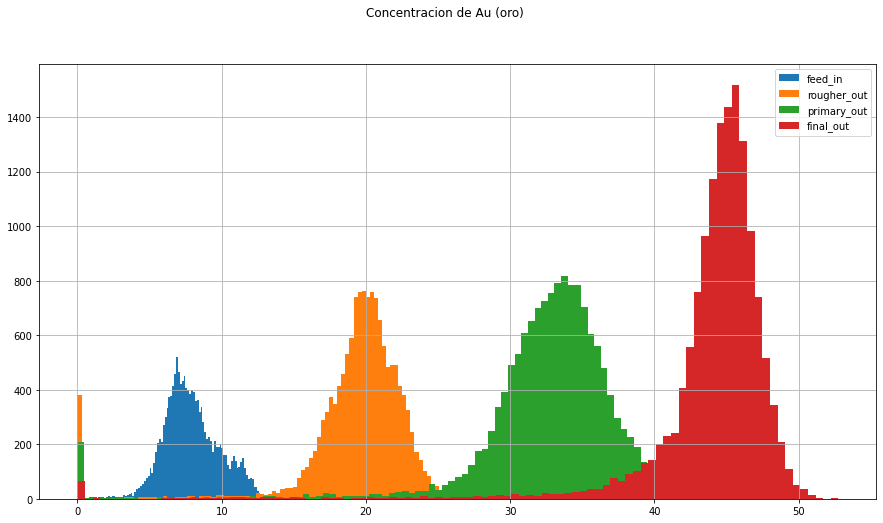

In [26]:
dif_concentracion(data_train['rougher.input.feed_au']
                  ,data_train['rougher.output.concentrate_au']
                  ,data_train['primary_cleaner.output.concentrate_au']
                  ,data_train['final.output.concentrate_au']
                  ,"Au (oro)")

Vemos que la concentración de oro en cada fase va aumentando.

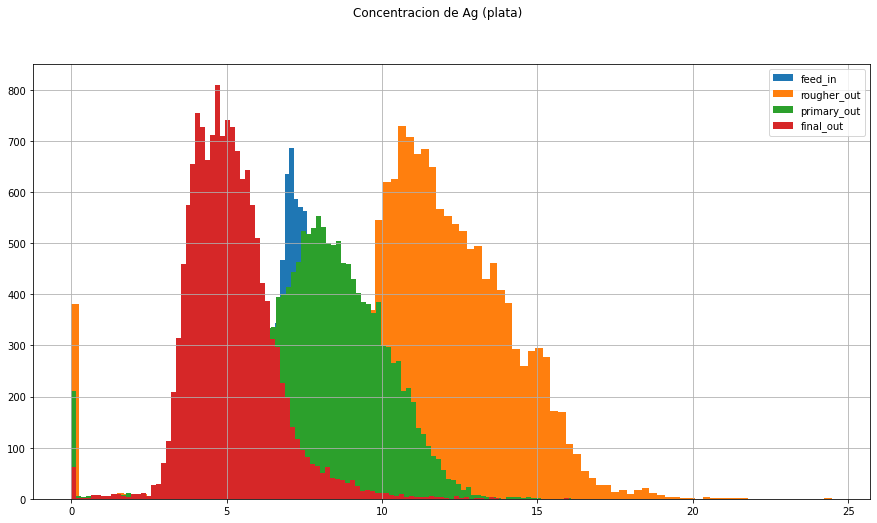

In [27]:
dif_concentracion(data_train['rougher.input.feed_ag']
                  ,data_train['rougher.output.concentrate_ag']
                  ,data_train['primary_cleaner.output.concentrate_ag']
                  ,data_train['final.output.concentrate_ag']
                  ,"Ag (plata)")

Vemos que la concentración de plata aumenta luego de la fase de flotación, para luego disminuir en el resto de las etapas.

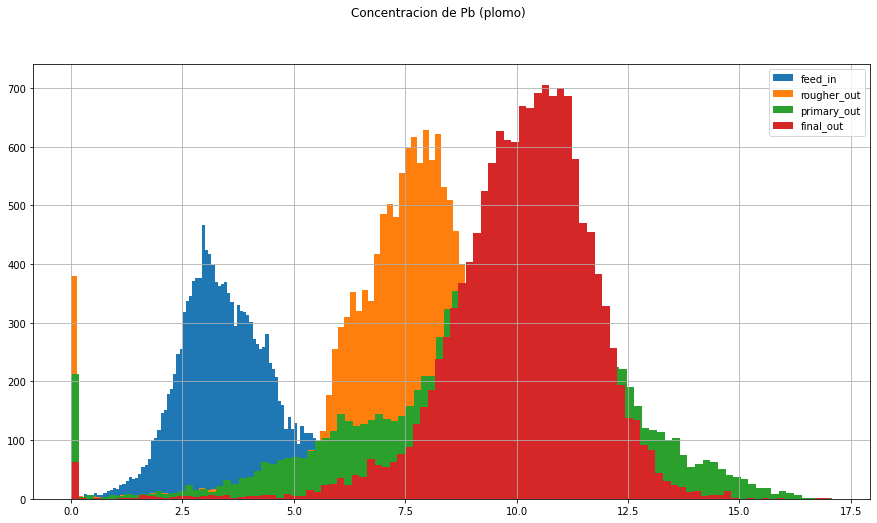

In [28]:
dif_concentracion(data_train['rougher.input.feed_pb']
                  ,data_train['rougher.output.concentrate_pb']
                  ,data_train['primary_cleaner.output.concentrate_pb']
                  ,data_train['final.output.concentrate_pb']
                  ,"Pb (plomo)")

Finalmente vemos que la concentración del Plomo aumenta en cada fase.

### Limpieza de valores anormales

En los histogramas anteriores que muestran las concentraciones totales en cada fase, vemos algunos valores anormales cercanos a 0 en la distribución total. Estos valores son pocos en relación a los datos totales, pero pueden afectar el entrenamiento de nuestro modelo, por lo tanto, procederé a eliminarlos.

In [29]:
#Elimino los valores menores que 1 para las concentraciones de Oro
data_train = data_train.drop(data_train[data_train['rougher.input.feed_au']<1].index)
data_train = data_train.drop(data_train[data_train['rougher.output.concentrate_au']<1].index)
data_train = data_train.drop(data_train[data_train['primary_cleaner.output.concentrate_au']<1].index)
data_train = data_train.drop(data_train[data_train['final.output.concentrate_au']<1].index)

#Elimino los valores menores que 1 para las concentraciones de Plata
data_train = data_train.drop(data_train[data_train['rougher.input.feed_ag']<1].index)
data_train = data_train.drop(data_train[data_train['rougher.output.concentrate_ag']<1].index)
data_train = data_train.drop(data_train[data_train['primary_cleaner.output.concentrate_ag']<1].index)
data_train = data_train.drop(data_train[data_train['final.output.concentrate_ag']<1].index)

#Elimino los valores menores que 1 para las concentraciones de Plomo
data_train = data_train.drop(data_train[data_train['rougher.input.feed_pb']<1].index)
data_train = data_train.drop(data_train[data_train['rougher.output.concentrate_pb']<1].index)
data_train = data_train.drop(data_train[data_train['primary_cleaner.output.concentrate_pb']<1].index)
data_train = data_train.drop(data_train[data_train['final.output.concentrate_pb']<1].index)

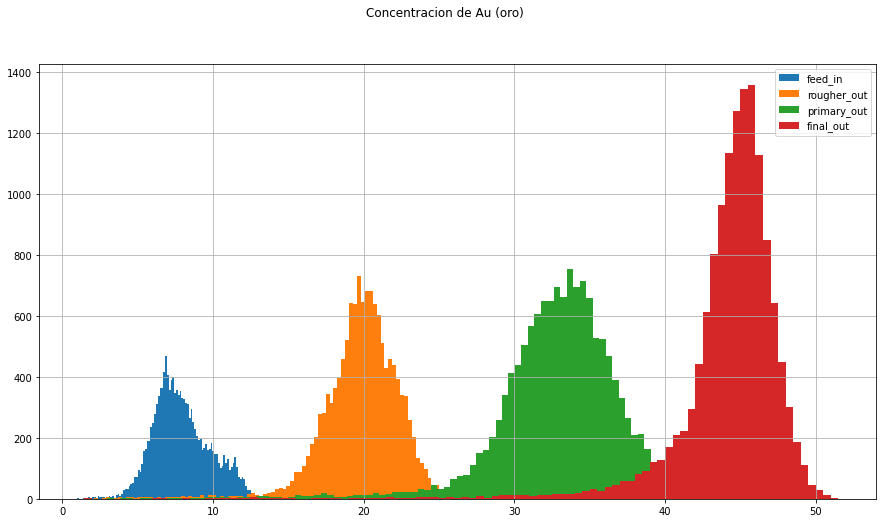

In [30]:
dif_concentracion(data_train['rougher.input.feed_au']
                  ,data_train['rougher.output.concentrate_au']
                  ,data_train['primary_cleaner.output.concentrate_au']
                  ,data_train['final.output.concentrate_au']
                  ,"Au (oro)")

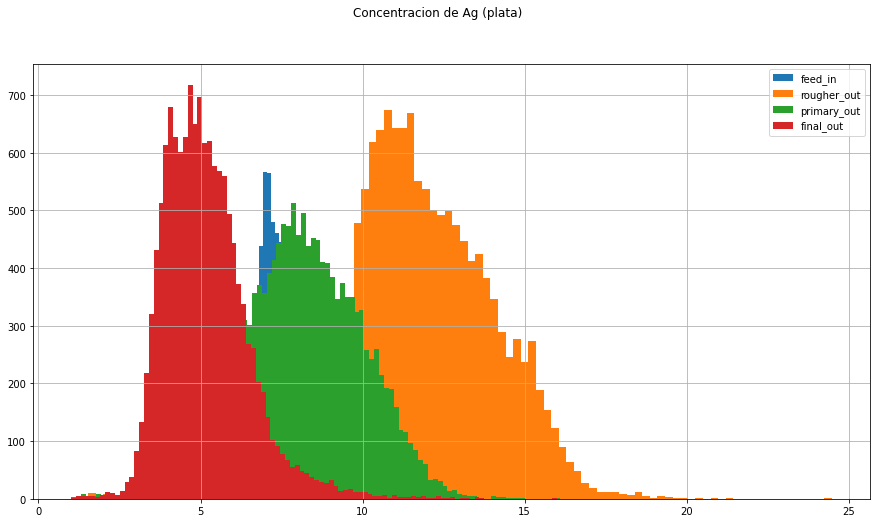

In [31]:
dif_concentracion(data_train['rougher.input.feed_ag']
                  ,data_train['rougher.output.concentrate_ag']
                  ,data_train['primary_cleaner.output.concentrate_ag']
                  ,data_train['final.output.concentrate_ag']
                  ,"Ag (plata)")

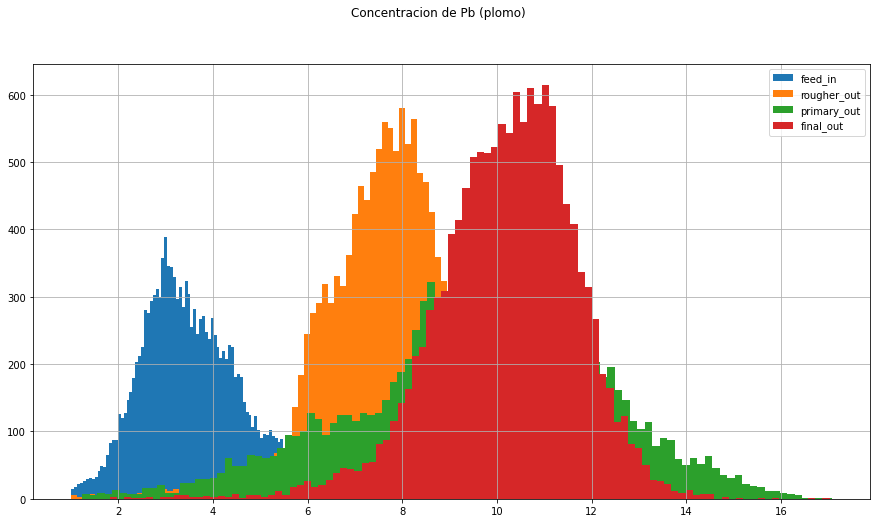

In [32]:
dif_concentracion(data_train['rougher.input.feed_pb']
                  ,data_train['rougher.output.concentrate_pb']
                  ,data_train['primary_cleaner.output.concentrate_pb']
                  ,data_train['final.output.concentrate_pb']
                  ,"Pb (plomo)")

Los datos anomalos cercanos a cero fueron eliminados correctamente,

### Distribución del tamaño de las particulas de alimentación

En el dataset que se nos proporcionó, existe una columna que indica el tamaño de las particulas en la entrada (`rougher.input.feed_size`). Sabemos que si la distribución de estas partículas al entrenar el modelo es muy distinta al momento de aplicarlo con nueva data, las predicciones pueden ser erroneas. Por esto compararé la distribución de esta caracteristica entre la data en entrenamiento y la data de prueba.

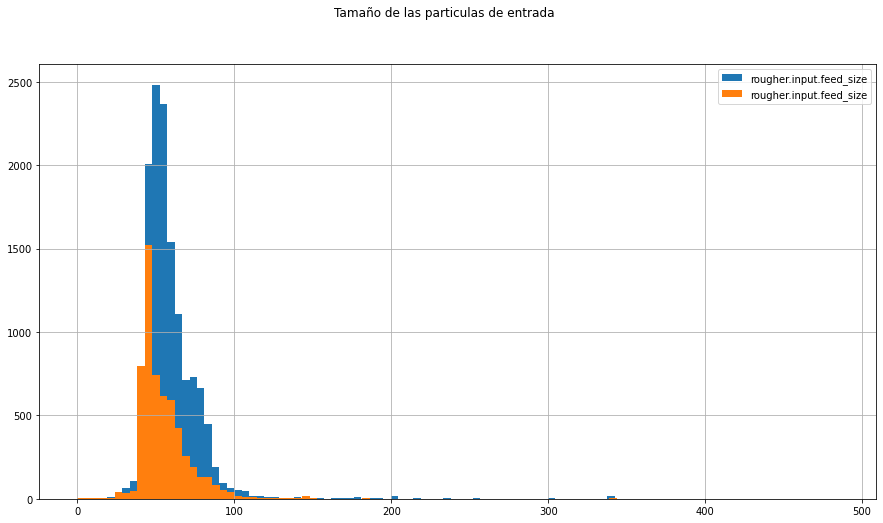

In [33]:
data_train['rougher.input.feed_size'].hist(bins=100,figsize=(15,8))
data_test['rougher.input.feed_size'].hist(bins=100,figsize=(15,8))

plt.suptitle(f'Tamaño de las particulas de entrada')
plt.legend(['rougher.input.feed_size', 'rougher.input.feed_size',])
plt.show()

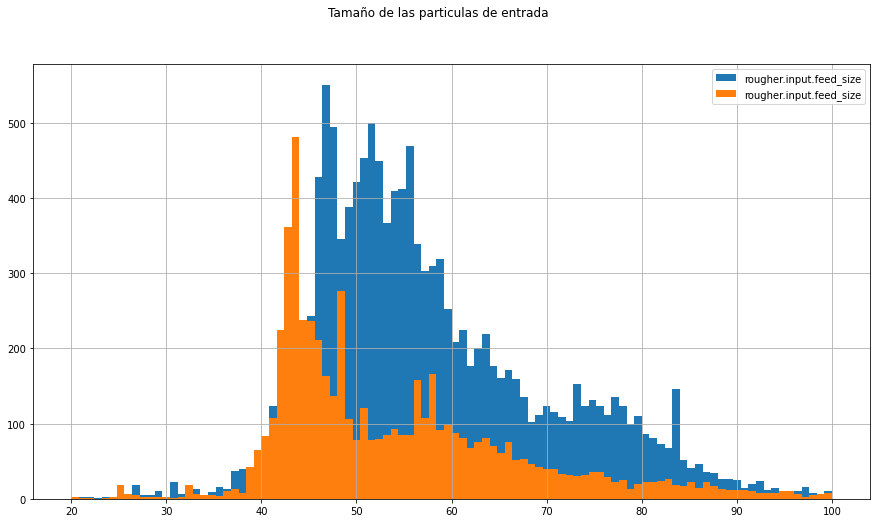

In [34]:
data_train['rougher.input.feed_size'].hist(bins=100,figsize=(15,8),range=(20, 100))
data_test['rougher.input.feed_size'].hist(bins=100,figsize=(15,8),range=(20, 100))

plt.suptitle(f'Tamaño de las particulas de entrada')
plt.legend(['rougher.input.feed_size', 'rougher.input.feed_size',])
plt.show()

En general, las distribuciones no son exactamente iguales (sobre todo al hacer zoom), sin embargo, no son significativamente diferentes.

## Entrenamiento de modelos

Según los requerimentos de la empresa, necesitamos confeccionar dos modelos, uno que sea capaz de predecir la cantidad de concentración de oro a la salida de la flotación (Rougher) y otro que sea capaz de predecir la cantidad de oro final.

### Metrica de evaluación del modelo (sMAPE)

Para poder evaluar el desempeño del modelo se nos solicita utilizar la metrica sMAPE (error medio absoluto porcentual simétrico). Es similar al MAE, pero se expresa en valores relativos en lugar de absolutos.
La fórmula para cálcular este valor es la siguiente:

In [35]:
display(Image(url='https://practicum-content.s3.us-west-1.amazonaws.com/resources/moved_smape_1576239058_1589899769.jpg'))

Pero dado que tenemos dos objetivos (`rougher.output.recovery` y `final.output.recovery`). Necesitamos aplicar una metrica que considere los dos. 

In [36]:
display(Image(url='https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/DS_sprint_10/ES/moved_10.3.3ES.png'))

A continuación crearé una función para poder calcular facilmente el desempeño de nuestros futuros modelos:

In [37]:
def smape_final(y, y_pred):
    # Definimos el número de observaciones de la muestra
    n = len(y)

    # Guardamos los valores absolutos del objetivo, predicciones y de su diferencia para el concentrado rougher
    y_rougher = abs(y.iloc[:, 0])
    y_pred_rougher = abs(y_pred[:, 0])
    diff_rougher = abs(y.iloc[:, 0] - y_pred[:, 0])

    # Guardamos los valores absolutos del objetivo, predicciones y de su diferencia para el concentrado final
    y_final = abs(y.iloc[:, 1])
    y_pred_final = abs(y_pred[:, 1])
    diff_final = abs(y.iloc[:, 1] - y_pred[:, 1])

    # Calculamos el smape para concentrado rougher y final 
    smape_rougher = (1/n) * np.sum(diff_rougher / ((y_rougher + y_pred_rougher)/2)) * 100

    smape_final = (1/n) * np.sum(diff_final / ((y_final + y_pred_final)/2)) * 100

    # Calculamos el smape final 
    smape_final_score = (0.25*smape_rougher) + (0.75*smape_final)

    return smape_final_score

Una vez definida la función que calcula la metrica sMAPE final, procedemos a crear una metrica personalizada, la cual intentaremos maximizar el momento de los entrenamientos de modelos. 

In [38]:
smape_score = make_scorer(smape_final, greater_is_better=False)

### Entrenamiento de modelos

A continuación entrenaré los modelos para predecir cada fase (Rougher y final) y los evaluaré aplicando validación cruzada. Los objetivos para cada modelo son `rougher.output.recovery` y `final.output.recovery` respectivamente. Dado que el conjunto de entrenamiento posee mas columnas de las que necesitamos, procederé a eliminar todas las columnas que no necesitamos. Para esto, eliminaré todas las columnas que no tenia el dataset de prueba menos las columnas objetivo. Recordar que estas columnas ya las calculamos en un punto anterior y las almacenamos en la lista "diferencia".

#### Preparación final de dataset de entrenamiento

In [39]:
#Remuevo los nombres de las columnas objetivo en la lista "diferencia"
diferencia.remove('rougher.output.recovery')
diferencia.remove('final.output.recovery')

#Remuevo todas las columnas que figuran en la lista "diferencia"
data_train = data_train.drop(diferencia, axis=1)
#Eliminamos los valores ausentes
data_train = data_train.dropna()

data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12274 entries, 0 to 16859
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        12274 non-null  object 
 1   final.output.recovery                       12274 non-null  float64
 2   primary_cleaner.input.sulfate               12274 non-null  float64
 3   primary_cleaner.input.depressant            12274 non-null  float64
 4   primary_cleaner.input.feed_size             12274 non-null  float64
 5   primary_cleaner.input.xanthate              12274 non-null  float64
 6   primary_cleaner.state.floatbank8_a_air      12274 non-null  float64
 7   primary_cleaner.state.floatbank8_a_level    12274 non-null  float64
 8   primary_cleaner.state.floatbank8_b_air      12274 non-null  float64
 9   primary_cleaner.state.floatbank8_b_level    12274 non-null  float64
 10  primary_cl

Luego de esto, tenemos nuestros dataset de entrenamiento listo para el entrenamiento, con 12274 caracteristicas no nulas.

In [40]:
#Definimos caracteristicas y objetivos
features = data_train.drop(['date','rougher.output.recovery','final.output.recovery'], axis=1)
target = data_train[['rougher.output.recovery', 'final.output.recovery']]

#### Entrenamiento del modelo

In [41]:
#Establecemos distintos modelos
model_tree = DecisionTreeRegressor()
model_forest = RandomForestRegressor()
model_linear = LinearRegression()

#Establecemos distintos hiperparametros para cada modelo(fase Rougher)
param_grid_tree = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
param_grid_forest = {'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
param_grid_linear = {'fit_intercept': [True, False], 'normalize': [True, False]}

#Buscamos los mejores hiperparametros para DecisionTreeRegressor con 3 grupos de validacion (cv=3)
grid_search = GridSearchCV(model_tree, param_grid_tree,scoring=smape_score, cv=3)
grid_search.fit(features, target)
best_params_tree = grid_search.best_params_
best_score_tree = grid_search.best_score_

#Buscamos los mejores hiperparametros para RandomForestRegressor con 3 grupos de validacion (cv=3)
grid_search = GridSearchCV(model_forest, param_grid_forest,scoring=smape_score, cv=3)
grid_search.fit(features, target)
best_params_forest = grid_search.best_params_
best_score_forest = grid_search.best_score_

#Buscamos los mejores hiperparametros para LinearRegression con 3 grupos de validacion (cv=3)
grid_search = GridSearchCV(model_linear, param_grid_linear,scoring=smape_score, cv=3)
grid_search.fit(features, target)
best_params_linear = grid_search.best_params_
best_score_linear = grid_search.best_score_

print_mejorado(f"Mejores hiperparámetros(tree): {best_params_tree}",20)
print_mejorado(f"Mejor puntuación de validación cruzada(tree): {abs(best_score_tree):.3f}", 20)
print("")
print_mejorado(f"Mejores hiperparámetros(forest): {best_params_forest}",20)
print_mejorado(f"Mejor puntuación de validación cruzada(forest): {abs(best_score_forest):.3f}", 20)
print("")
print_mejorado(f"Mejores hiperparámetros(linear): {best_params_linear}",20)
print_mejorado(f"Mejor puntuación de validación cruzada(linear): {abs(best_score_linear):.3f}", 20)

El mejor modelo para la prediccion de concentración de oro fue el modelo de arbol de decisión (DecisionTreeRegressor) con los hiperparametros: {'max_depth': 2}, el cual obtuvo un valor **sMAPE final de 4.056.**

## Aplicación del modelo con muestra de prueba

Finalmente, una vez identificado el mejor modelo con sus respectivos hiperparametros, lo entrenamos y procedemos a aplicarlo a nuestros conjunto de datos de prueba proporcionados por la empresa. Para esto, agregaré dos columnas adicionales al dataset de prueba con las predicciones de nuestro modelo:

In [42]:
model=DecisionTreeRegressor(max_depth=2)
model.fit(features, target)

DecisionTreeRegressor(max_depth=2)

In [43]:
data_test = data_test.dropna()
data_test_aux = data_test.drop(['date'], axis=1)

#Agregamos nuevas columnas con las predicciones a la muestra de prueba
data_test['rougher.output.recovery.predict'] = model.predict(data_test_aux)[:, 0]
data_test['final.output.recovery.predict'] = model.predict(data_test_aux)[:, 1]

In [44]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5383 entries, 0 to 5855
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5383 non-null   object 
 1   primary_cleaner.input.sulfate               5383 non-null   float64
 2   primary_cleaner.input.depressant            5383 non-null   float64
 3   primary_cleaner.input.feed_size             5383 non-null   float64
 4   primary_cleaner.input.xanthate              5383 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5383 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5383 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5383 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5383 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5383 non-null   float64
 10  primary_clea

In [45]:
data_test[['date','rougher.output.recovery.predict','final.output.recovery.predict']].head(20)

date  rougher.output.recovery.predict  \
0   2016-09-01 00:59:59                        84.880397   
1   2016-09-01 01:59:59                        84.880397   
2   2016-09-01 02:59:59                        84.880397   
3   2016-09-01 03:59:59                        84.880397   
4   2016-09-01 04:59:59                        84.880397   
5   2016-09-01 05:59:59                        84.880397   
6   2016-09-01 06:59:59                        84.880397   
7   2016-09-01 07:59:59                        78.157992   
8   2016-09-01 08:59:59                        78.157992   
9   2016-09-01 09:59:59                        78.157992   
10  2016-09-01 10:59:59                        78.157992   
11  2016-09-01 11:59:59                        78.157992   
12  2016-09-01 12:59:59                        78.157992   
13  2016-09-01 13:59:59                        78.157992   
14  2016-09-01 14:59:59                        78.157992   
15  2016-09-01 15:59:59                        78.157992   
16  2016-09-01 16:59:59                        84.880397   
17  2016-09-01 17:59:59                        84.880397   
18  2016-09-01 18:59:59                        84.880397   
19  2016-09-01 19:59:59                        78.157992   

    final.output.recovery.predict  
0                       90.226647  
1                       90.226647  
2                       90.226647  
3                       90.226647  
4                       90.226647  
5                       90.226647  
6                       90.226647  
7                       91.555130  
8                       91.555130  
9                       91.555130  
10                      91.555130  
11                      91.555130  
12                      91.555130  
13                      91.555130  
14                      91.555130  
15                      91.555130  
16                      90.226647  
17                      90.226647  
18                      90.226647  
19                      91.555130

## Conclusion

Luego de poner a prueba tres modelos de predicción diferentes, el modelo de arbol de decisión(DecisionTreeRegressor) fue el que mostro un mejor desempeño utilizando como hiperparaneotro max_depth=2.
**Respecto al desempeño, obtuvimos que el modelo predice la concentración de oro a la salida de la flotación con un error medio absoluto porcentual simétrico(sMAPE) de 4.046.**